## Customer Segmentation using Clustering

**OBJECTIVE**:

Using various clustering methods, find customer's expenses based on their annual income.

**About Dataset**

The dataset is downloaded from Kaggle.com. 

The dataset has 200 entries and 5 features.

**INDEX**

* Import Libraries
* Data Overview
* Data Analysing
* KMEANS Clustering
* Hierarchical Agglomerative Clustering
* DBSCAN
* MiniBatch KMeans
* Mean Shift
* Conclusion



### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN, MiniBatchKMeans, MeanShift


### Data Overview

The data set has 200 rows and 5 columns. Summary of Datatypes in datasets are


* 4 int64
* 1 object

Columns and their respective datatypes are given below:
                
*   CustomerID             -> int64 
*   Gender                 -> object
*   Age                    -> int64 
*   Annual Income (k$)     -> int64 
*   Spending Score (1-100) -> int64 

THERE ARE NO MISSING VALUES IN DATASET


**READING DATASET**

In [2]:
df=pd.read_csv(r'C:\Users\APOORVA\Desktop\MACHINE LEARNING\IBM\4) Unsupervised Machine Learning\archive\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
print("Number of rows : ",df.shape[0])
print("Number of columns : ",df.shape[1])

Number of rows :  200
Number of columns :  5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**CHECKING FOR MISSING VALUES**

In [8]:
df.isna().apply(pd.value_counts).T

,False
CustomerID,200
Gender,200
Age,200
Annual Income (k$),200
Spending Score (1-100),200


### Data Analysing

**SELECTING THE FEATURES TO STANDARDIZE**

In [9]:
df_std=df.drop(['CustomerID'],axis=1)

In [10]:
df_std

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**CONVERTING CATEGORICAL FEATURES**

In [11]:
le=LabelEncoder()

In [12]:
df_std['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [13]:
df_std['Gender']=le.fit_transform(df['Gender'])

In [14]:
df_std['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

**STANDARDIZATION**

In [15]:
std=StandardScaler()

In [16]:
df_std=std.fit_transform(df_std)

In [17]:
#Choosing Annual Income and Spending Scores

X=df.drop(['CustomerID','Gender','Age'],axis=1)
X=X.values

In [18]:
X=std.fit_transform(X)

In [19]:
print(X)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

### KMEANS CLUSTERING

**CHOOSING CORRECT VALUE OF *K* USING ELBOW METHOD**

In [20]:
wss=[]
cluster_list=list(range(1,11))
for x in cluster_list:
    kmeans=KMeans(n_clusters=x,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

**Plotting the elbow graph**

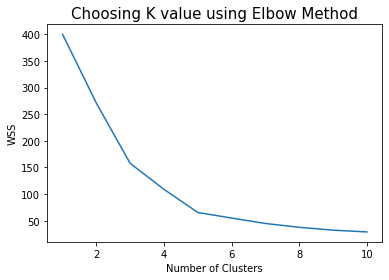

In [21]:
plt.plot(cluster_list,wss)
plt.title('Choosing K value using Elbow Method',fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

Optimun number of Cluster is 5

In [22]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


**PLOTTING ALL THE CLUSTERS AND THEIR CENTROID**

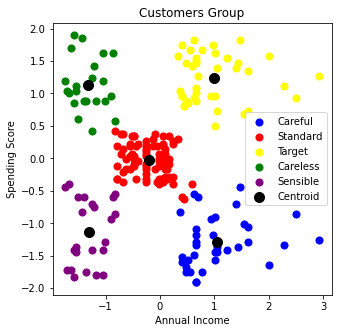

In [23]:
plt.figure(figsize=(5,5))
c1=plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='blue')
c2=plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red')
c3=plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow')
c4=plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green')
c5=plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple')
cen=plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black')
plt.legend([c1,c2,c3,c4,c5,cen],['Careful','Standard','Target','Careless','Sensible','Centroid'])
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [24]:
df['Target']=Y

In [25]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


**Conclusion drawn from graph:**

* **Cluster 1 (Blue)**: *Standard*
This Group of customer has high Annual Income and Expenses are low.

* **Cluster 2 (Red)**: 
This Group of customer has average Annual Income and average Expenses.

* **Cluster 3 (Yellow)**:
This Group of customers has high Annual Income and high Expenses.

* **Cluster 4 (Green)**:
This Group of customers has low Annual Income but high Expenses.

* **Cluster 5 (Purple)**:
This Group of customers has low Annual Income and low Expenses.


### HIERARCHICAL AGGLOMERATIVE CLUSTERING

In [26]:
agg=AgglomerativeClustering(n_clusters=5)

In [27]:
Y1=agg.fit_predict(X)
print(Y1)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


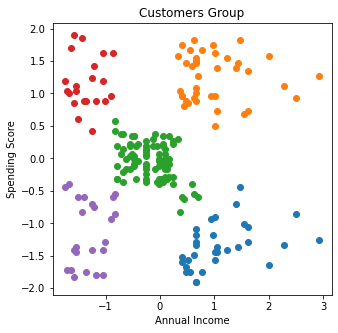

In [28]:
clusters = unique(Y1)
plt.figure(figsize=(5,5))
for cluster in clusters:
    row_ix = where(Y1 == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### DENSITY BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE (DBSCAN)

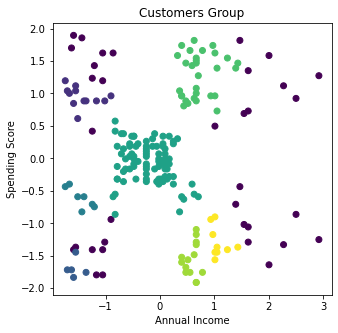

In [29]:

db=DBSCAN(eps=0.3,min_samples=5)
db=db.fit_predict(X)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=db, cmap="viridis")
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### MINI-BATCH KMEANS 


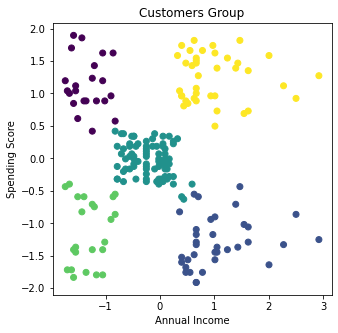

In [30]:
minik=MiniBatchKMeans(n_clusters=5)
minik=minik.fit_predict(X)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=minik, cmap="viridis")
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### MEAN SHIFT

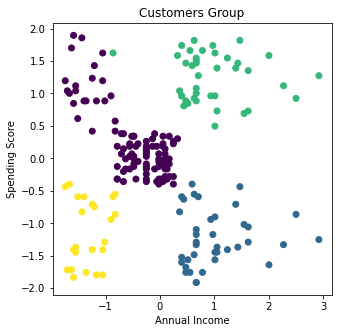

In [31]:
ms=MeanShift(bandwidth=1)
ms=ms.fit_predict(X)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=ms, cmap="viridis")
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### CONCLUSION:

Clustering is an unsupervised problem of finding natural groups in the feature space of input data. There are many different clustering algorithms, and no single best method for all datasets. 

In this case, reasonable grouping was found using **KMeans**. However, **MiniBatchKMeans** gave equivalent result to that of standard KMeans.

**Hierarchical Agglomerative Clustering** gave somewhat similar result to KMeans.

**DBSCAN** does not give proper grouping in this case and some tuning is required.

Using **Mean Shift**, could not achieve a reasonable result on this dataset.